In [1]:
%matplotlib
import numpy as np
import matplotlib.pyplot as plt

Using matplotlib backend: Qt5Agg


In [2]:
C = 1e-4
R = 280.0
t = 0.05
#q0/q(t)
qq0 = 0.01

def fncL(L):
    eP = np.exp(-(R*t/(2*L)))
    sq = ((1/(L*C)) - ((R/(2*L))**2))**(1/2)
    fl = eP*np.cos(sq*t) - qq0
    return fl


In [3]:
def dfncL(L):
    #not yet *t
    theta = np.sqrt((1/(L*C)) - (R/(2*L))**2)
    eP = np.exp(-((R*t)/(2*L)))
    eq1 = eP*(-(np.sin(theta*t)))*(((t/2)*((R**2)/(2*(L**3))) - (1/(C*(L**2))))/theta)
    eq2 = np.cos(theta*t)*eP*((R*t)/(2*(L**2)))
    dfL = eq1 + eq2
    return dfL
    

In [4]:
def Newton(xi, err, fnc, dfnc):
    er = err + 10
    i = 0
    y = np.array([0])
    x = np.array([0])
    while not er < err:
        xi1 = xi - fnc(xi)/dfnc(xi)
        er = np.abs((xi1 -xi)/xi1) * 100
        print('i = {:3d}, L = {:22}, error = {}%'.format(i,xi1,er))
        y = np.append(y, er)
        x = np.append(x, i)
        xi = xi1
        i += 1
    return x, y

i =   0, L =      7.830151048185711, error = 0.0019290583895723167%
i =   1, L =      7.830300111562414, error = 0.0019036738640757424%
i =   2, L =      7.830447216115313, error = 0.0018786226231901088%
i =   3, L =      7.830592387491917, error = 0.00185390031073754%
i =   4, L =     7.8307356510063615, error = 0.0018295026269477019%
i =   5, L =      7.830877031643678, error = 0.0018054253277787233%
i =   6, L =      7.831016554064009, error = 0.0017816642241482335%
i =   7, L =      7.831154242606774, error = 0.0017582151813126745%
i =   8, L =      7.831290121294782, error = 0.0017350741180999836%
i =   9, L =     7.8314242138382895, error = 0.0017122370062678247%
i =  10, L =      7.831556543639014, error = 0.0016896998698399024%
i =  11, L =      7.831687133794094, error = 0.0016674587844090042%
i =  12, L =           7.8318160071, error = 0.0016455098764974797%
i =  13, L =      7.831943186056395, error = 0.0016238493228844092%
i =  14, L =      7.832068692869953, error = 0.001

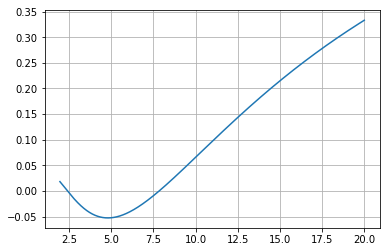

In [12]:
Newton(7.83, 0.001, fncL, dfncL)

#plot graph
x = np.arange(1.96, 20,0.01)
plt.plot(x, fncL(x))
plt.grid()